In [ ]:
#Import necessary libraries
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)

In [ ]:
#Create variables containing the 3 different datasets

X_train = pd.read_csv('X_train.csv')
Y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')

## I/Data Visualization

In [ ]:
X_train.head(10)

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,DE_GAS,FR_GAS,DE_COAL,FR_COAL,DE_HYDRO,FR_HYDRO,DE_NUCLEAR,FR_NUCLEAR,DE_SOLAR,FR_SOLAR,DE_WINDPOW,FR_WINDPOW,DE_LIGNITE,DE_RESIDUAL_LOAD,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
0,1054,206,FR,0.210099,-0.427458,-0.606523,0.606523,NaN,0.692860,NaN,-0.692860,0.441238,-0.213766,0.740627,0.288782,2.209047,0.207838,0.709614,-0.190463,0.101766,1.248911,-0.573370,-0.269460,0.870344,0.626666,-0.444661,-0.172680,-0.556356,-0.790823,-0.283160,-1.069070,-0.063404,0.339041,0.124552,-0.002445
1,2049,501,FR,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,1.130838,0.174773,0.426940,-0.170392,-0.762153,0.187964,-0.807112,-1.882740,-2.185961,1.987428,3.237380,-0.035514,-0.107350,-0.194308,-0.395469,-1.183194,-1.240300,-0.770457,1.522331,0.828412,0.437419,1.831241,-0.659091,0.047114,-0.490365
2,1924,687,FR,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,1.682587,2.351913,2.122241,1.572267,0.777053,-0.108578,0.779142,-1.897109,0.735137,-1.115583,-0.371039,-0.298755,-0.141239,0.428272,1.336625,1.947273,-0.480700,-0.313338,0.431134,0.487608,0.684884,0.114836,0.535974,0.743338,0.204952
3,297,720,DE,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,-0.563230,0.487818,0.194659,-1.473817,-0.786025,-0.368417,1.320483,-0.205547,-1.589554,1.751523,0.562944,-0.010090,0.366885,-2.330557,-1.191889,-0.976974,-1.114838,-0.507570,-0.499409,-0.236249,0.350938,-0.417514,0.911652,-0.296168,1.073948
4,1101,818,FR,0.143807,-0.617038,-0.924990,0.924990,NaN,0.990324,NaN,-0.990324,0.238693,-0.240862,1.003734,-0.274975,-0.230179,-0.795983,-0.005581,0.176935,0.693543,0.723587,-0.774941,-0.564498,0.691040,0.571613,-0.526267,-0.541465,-0.424550,-1.088158,-1.011560,0.614338,0.729495,0.245109,1.526606,2.614378
5,1520,467,FR,-0.295296,-0.765120,-0.717490,0.717490,-1.117139,-0.200305,1.117139,0.200305,1.533595,0.306422,-1.240316,-0.775944,2.306980,0.593251,-1.218842,-1.920695,2.140860,2.054491,-0.977976,-0.245628,-0.462173,-0.001279,-0.860628,-0.962519,-0.193837,-0.871600,-0.917234,0.102046,0.472708,0.891049,0.861408,1.124457
6,1546,144,FR,-0.234965,-0.677085,0.399588,-0.399588,0.183998,-0.986235,-0.183998,0.986235,0.818506,0.068942,-1.224659,-0.768060,0.740743,0.017134,-0.678965,-1.347828,1.600429,1.687112,0.550149,-0.903132,-1.866941,-1.128431,-0.586051,-1.658394,-0.529800,-0.318920,-1.220760,-0.512991,0.147507,1.889739,0.498226,0.681739
7,1069,1136,FR,0.332223,-0.546797,-0.507773,0.507773,NaN,0.569585,NaN,-0.569585,0.317466,-0.196255,0.832272,0.421619,1.873229,0.158725,0.568656,-0.119610,1.188313,0.816218,-0.738634,-0.805031,0.743142,0.509094,-0.415254,-0.744328,-0.051535,-0.701035,-0.394857,1.990978,0.902719,0.206769,0.993304,-0.223739
8,1323,83,FR,-0.023023,-0.604694,-1.196787,1.196787,-0.519339,0.373109,0.519339,-0.373109,0.627707,0.584996,-1.125247,-0.766389,-0.001041,-1.045716,-0.008729,-0.137666,0.697748,0.224662,-0.018493,-0.739917,-0.368339,-0.204770,-0.447048,-0.207390,0.009356,-0.261496,-0.841560,-1.024980,-1.564174,2.688208,3.061210,3.755240
9,1618,307,FR,0.564657,0.273776,-0.439063,0.439063,-0.636654,0.342057,0.636654,-0.342057,1.570867,1.033961,0.235880,-0.787991,-0.119898,0.214925,-0.467941,-0.110980,-0.496852,-0.140213,-0.626282,1.212941,0.612995,1.154090,0.027862,-0.972344,-0.806435,-0.752273,-0.767578,-0.371475,-0.459768,-1.487154,-0.692378,-0.768283


In [ ]:
Y_train.head()

,ID,TARGET
0,1054,0.028313
1,2049,-0.112516
2,1924,-0.180840
3,297,-0.260356
4,1101,-0.071733


In [ ]:
X_test.head()

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,DE_GAS,FR_GAS,DE_COAL,FR_COAL,DE_HYDRO,FR_HYDRO,DE_NUCLEAR,FR_NUCLEAR,DE_SOLAR,FR_SOLAR,DE_WINDPOW,FR_WINDPOW,DE_LIGNITE,DE_RESIDUAL_LOAD,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
0,1115,241,FR,0.340083,-0.433604,-0.423521,0.423521,0.165333,0.519419,-0.165333,-0.519419,1.524963,0.423845,2.137016,0.478424,0.776246,-0.371184,0.069696,0.057826,0.005100,-0.276211,-1.145765,-0.827504,0.778229,1.246268,-0.222525,-0.513180,-0.182048,-0.982546,-0.876632,0.880491,0.692242,0.569419,-0.029697,-0.929256
1,1202,1214,FR,0.803209,0.780411,0.601610,-0.601610,0.342802,0.555367,-0.342802,-0.555367,1.064102,1.807256,0.089534,-0.792111,1.549245,0.107882,0.826372,0.746628,0.585133,1.034943,-0.211726,-0.698175,0.727622,0.553214,0.857739,-0.340595,-0.301094,-0.759816,-1.221443,-0.616617,-0.737496,0.251251,0.753646,0.664086
2,1194,1047,FR,0.795540,0.721954,1.179158,-1.179158,1.620928,0.666901,-1.620928,-0.666901,0.128004,-0.043300,-0.829546,-0.785153,0.419503,0.014481,0.444562,1.000065,-0.427068,-0.011782,2.373643,1.248551,-1.440563,-1.398675,0.447967,0.796475,-0.367248,0.376055,-0.483363,0.865138,0.120079,-1.485642,-0.326450,-0.349747
3,1084,1139,FR,0.172555,-0.723427,-0.044539,0.044539,NaN,-0.205276,NaN,0.205276,1.046069,-0.174150,0.888429,-0.283794,1.864139,0.114829,0.616779,-0.779813,0.727103,1.018475,-1.146251,-0.999996,0.792428,0.905864,-0.561295,-0.542606,-0.013291,-0.791119,-0.894309,0.239153,0.457457,-0.746863,2.262654,0.642069
4,1135,842,FR,0.949714,0.420236,0.617391,-0.617391,0.608561,-0.240856,-0.608561,0.240856,1.376753,1.413967,1.703635,-0.239676,0.815007,0.179202,0.702691,0.169555,-0.873472,-0.538052,-0.274033,-0.215250,0.923490,1.167985,0.503567,-0.230291,-0.609203,-0.744986,-1.196282,0.176557,0.312557,-2.219626,-0.509272,-0.488341


,col_name,data_type,null_num,null_perc
5,DE_FR_EXCHANGE,float64,25,1.67
6,FR_DE_EXCHANGE,float64,25,1.67
7,DE_NET_EXPORT,float64,124,8.30
8,FR_NET_EXPORT,float64,70,4.69
9,DE_NET_IMPORT,float64,124,8.30
10,FR_NET_IMPORT,float64,70,4.69
26,DE_RAIN,float64,94,6.29
27,FR_RAIN,float64,94,6.29
28,DE_WIND,float64,94,6.29
29,FR_WIND,float64,94,6.29


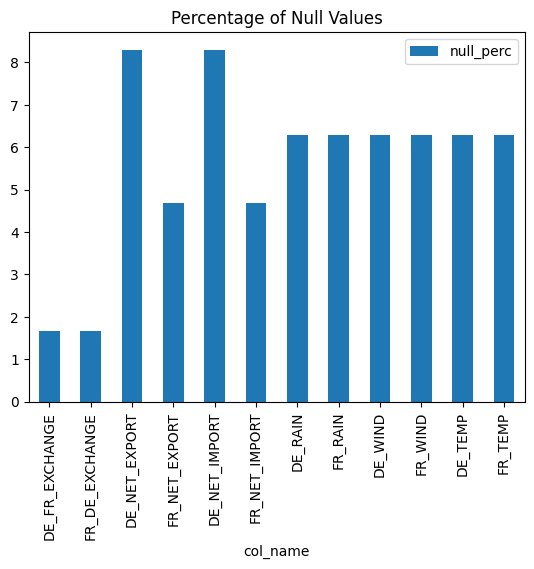

In [ ]:
def null_val_info(df):
    num_rows = df.shape[0]
    perc_list = [(col, df[col].dtype, df[col].isnull().sum(), round((df[col].isnull().sum()/num_rows)*100,2)) for col in df.columns]

    null_val = pd.DataFrame(perc_list).rename(columns={0:'col_name', 1:'data_type', 2:'null_num', 3:'null_perc'})
    null_val = null_val.loc[null_val['null_num'] > 0]

    null_val.plot(x = 'col_name', y = 'null_perc', kind = 'bar', rot = 90, title = 'Percentage of Null Values')

    return null_val

null_val_info(X_train)

In [ ]:
Y_train.isnull().sum()

ID        0
TARGET    0
dtype: int64

In [ ]:
# Removing rows with missing values
X_train_cleaned = X_train.dropna()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_cols = X_train.drop(columns=["DAY_ID","ID","COUNTRY"]).select_dtypes(include=['float64', 'int64']).columns

# Apply Min-Max Scaling to your DataFrame
X_train_cleaned[numerical_cols] = scaler.fit_transform(X_train_cleaned[numerical_cols])


X_train_cleaned

<ipython-input-10-154184fa0f07>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cleaned[numerical_cols] = scaler.fit_transform(X_train_cleaned[numerical_cols])


,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,DE_GAS,FR_GAS,DE_COAL,FR_COAL,DE_HYDRO,FR_HYDRO,DE_NUCLEAR,FR_NUCLEAR,DE_SOLAR,FR_SOLAR,DE_WINDPOW,FR_WINDPOW,DE_LIGNITE,DE_RESIDUAL_LOAD,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
1,2049,501,FR,0.521737,0.117143,0.516199,0.483801,0.398639,0.354731,0.601361,0.645269,0.285967,0.472718,0.352262,0.015180,0.258376,0.178281,0.225165,0.095581,0.828337,0.917056,0.252968,0.169572,0.650138,0.430436,0.117075,0.089860,0.085357,0.488477,0.397025,0.673163,0.885407,0.425460,0.604432,0.388720
2,1924,687,FR,0.851418,0.878392,0.706189,0.293811,0.388416,0.239226,0.611584,0.760774,0.814131,0.932159,0.816894,0.727599,0.203312,0.475521,0.221154,0.777611,0.077187,0.189771,0.197489,0.164025,0.800903,0.766560,0.856366,0.166706,0.126172,0.331832,0.347348,0.706566,0.685925,0.533863,0.681789,0.460008
3,297,720,DE,0.298236,0.156520,0.367334,0.632666,0.462429,0.709372,0.537571,0.290628,0.361910,0.409768,0.004740,0.004131,0.155064,0.576961,0.693331,0.234832,0.771231,0.378018,0.258326,0.247200,0.132821,0.275886,0.165775,0.102552,0.108830,0.198249,0.241835,0.661489,0.624055,0.567941,0.566290,0.549103
5,1520,467,FR,0.458264,0.177983,0.389566,0.610434,0.284059,0.549531,0.715941,0.450469,0.615611,0.440056,0.066996,0.008797,0.651847,0.440688,0.410483,0.157516,0.865478,0.678642,0.054338,0.146937,0.585272,0.506931,0.193252,0.117962,0.136842,0.144820,0.142571,0.627894,0.727518,0.566072,0.694907,0.554282
6,1546,144,FR,0.472296,0.200456,0.592978,0.407022,0.558302,0.385002,0.441698,0.614998,0.442133,0.375697,0.071171,0.012446,0.361019,0.332732,0.561183,0.291272,0.734656,0.604596,0.376400,0.039310,0.245091,0.288200,0.258096,0.047562,0.106845,0.224159,0.098327,0.544875,0.689722,0.656662,0.654555,0.508892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,1728,905,FR,0.752262,0.490563,0.701728,0.298272,0.540843,0.371863,0.459157,0.628137,0.816320,0.550881,0.448347,0.226458,0.164936,0.294246,0.622791,0.499112,0.557348,0.658262,0.166290,0.274931,0.691049,0.636920,0.455819,0.185826,0.140552,0.431890,0.523756,0.288387,0.432004,0.589170,0.636490,0.501159
1488,342,87,DE,0.458211,0.104943,0.219450,0.780550,0.104327,0.606964,0.895673,0.393036,0.527920,0.377804,0.211051,0.006145,0.604841,0.262220,0.758648,0.304910,0.430582,0.490912,0.047551,0.079497,0.589202,0.624390,0.163905,0.108261,0.230452,0.166346,0.193975,0.765374,0.773146,0.446803,0.606677,0.598822
1491,748,1083,DE,0.726137,0.498174,0.473641,0.526359,0.196714,0.417799,0.803286,0.582201,0.755144,0.862823,0.683659,0.284574,0.230510,0.381545,0.238807,0.380752,0.195524,0.304218,0.053550,0.236796,0.748390,0.797074,0.481072,0.236370,0.190291,0.184585,0.406587,0.648720,0.719336,0.384295,0.572771,0.445880
1492,1454,1133,FR,0.657358,0.285540,0.369036,0.630964,0.455266,0.844817,0.544734,0.155183,0.242604,0.592721,0.281196,0.010251,0.169968,0.600714,0.780771,0.560111,0.497194,0.449631,0.340136,0.027714,0.496542,0.480464,0.352841,0.146259,0.119300,0.130394,0.057342,0.778194,0.828164,0.572581,0.000000,0.352483


In [ ]:
DE_variables = [col for col in X_train.columns if (col.startswith('DE') or col in ["ID","DAY_ID"])]
FR_variables = [col for col in X_train.columns if (col.startswith('FR') or col in ["ID","DAY_ID"])]

In [ ]:
X_train_DE = X_train_cleaned[X_train_cleaned.COUNTRY == "DE"][DE_variables]

In [ ]:
X_train_DE

,ID,DAY_ID,DE_CONSUMPTION,DE_FR_EXCHANGE,DE_NET_EXPORT,DE_NET_IMPORT,DE_GAS,DE_COAL,DE_HYDRO,DE_NUCLEAR,DE_SOLAR,DE_WINDPOW,DE_LIGNITE,DE_RESIDUAL_LOAD,DE_RAIN,DE_WIND,DE_TEMP
3,297,720,0.298236,0.367334,0.462429,0.537571,0.361910,0.004740,0.155064,0.693331,0.771231,0.258326,0.132821,0.275886,0.102552,0.198249,0.661489
11,819,116,0.513994,0.563391,0.340136,0.659864,0.457613,0.386230,0.461592,0.050281,0.630983,0.238535,0.611351,0.472560,0.378044,0.434110,0.829437
12,918,406,0.650712,0.582117,0.483031,0.516969,0.197855,0.303221,0.192229,0.226010,0.268615,0.565644,0.639641,0.352790,0.195617,0.468500,0.781752
13,283,1175,0.450591,0.268844,0.299028,0.700972,0.375541,0.082127,0.320701,0.570319,0.470510,0.336159,0.153776,0.375971,0.313920,0.249999,0.528534
14,158,309,0.766279,0.725920,0.437054,0.562946,0.770184,0.886045,0.450573,0.785812,0.048499,0.005403,0.913263,0.925620,0.235010,0.111161,0.524019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,39,92,0.615792,0.274504,0.256759,0.743241,0.360068,0.206808,0.691529,0.583275,0.406707,0.295116,0.446110,0.516684,0.449036,0.235504,0.699870
1485,391,78,0.715463,0.695426,0.724377,0.275623,0.289130,0.236221,0.247357,0.579375,0.251837,0.601735,0.722292,0.372031,0.160825,0.203984,0.803166
1488,342,87,0.458211,0.219450,0.104327,0.895673,0.527920,0.211051,0.604841,0.758648,0.430582,0.047551,0.589202,0.624390,0.108261,0.166346,0.765374
1491,748,1083,0.726137,0.473641,0.196714,0.803286,0.755144,0.683659,0.230510,0.238807,0.195524,0.053550,0.748390,0.797074,0.236370,0.184585,0.648720


In [ ]:
X_train_FR = X_train_cleaned[X_train_cleaned.COUNTRY == "FR"][FR_variables]

In [ ]:
X_train_FR

,ID,DAY_ID,FR_CONSUMPTION,FR_DE_EXCHANGE,FR_NET_EXPORT,FR_NET_IMPORT,FR_GAS,FR_COAL,FR_HYDRO,FR_NUCLEAR,FR_SOLAR,FR_WINDPOW,FR_RESIDUAL_LOAD,FR_RAIN,FR_WIND,FR_TEMP
1,2049,501,0.117143,0.483801,0.354731,0.645269,0.472718,0.015180,0.178281,0.095581,0.917056,0.169572,0.117075,0.085357,0.397025,0.885407
2,1924,687,0.878392,0.293811,0.239226,0.760774,0.932159,0.727599,0.475521,0.777611,0.189771,0.164025,0.856366,0.126172,0.347348,0.685925
5,1520,467,0.177983,0.610434,0.549531,0.450469,0.440056,0.008797,0.440688,0.157516,0.678642,0.146937,0.193252,0.136842,0.142571,0.727518
6,1546,144,0.200456,0.407022,0.385002,0.614998,0.375697,0.012446,0.332732,0.291272,0.604596,0.039310,0.258096,0.106845,0.098327,0.689722
8,1323,83,0.218935,0.697710,0.669571,0.330429,0.515552,0.013219,0.133570,0.573825,0.309836,0.066026,0.290923,0.154985,0.153601,0.490790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,1218,38,0.460943,0.512411,0.674205,0.325795,0.316625,0.167295,0.207480,0.719895,0.339977,0.312151,0.432190,0.123151,0.256587,0.537380
1483,1776,510,0.193428,0.665479,0.824323,0.175677,0.233391,0.000457,0.430484,0.480075,0.468755,0.211578,0.208740,0.245345,0.393619,0.608052
1486,1401,985,0.614367,0.266532,0.696063,0.303937,0.714950,0.007133,0.399928,0.790818,0.051990,0.456657,0.546428,0.114759,0.180339,0.768986
1487,1728,905,0.490563,0.298272,0.371863,0.628137,0.550881,0.226458,0.294246,0.499112,0.658262,0.274931,0.455819,0.140552,0.523756,0.432004


# Separate Model

## Germany

In [ ]:
corr_matrix = X_train_DE.merge(Y_train,on="ID").drop(columns=["ID","DAY_ID"]).corr()
iters = range(len(corr_matrix.columns) - 1)
drop_cols = []

for i in iters:
    for j in range(i+1):
        item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
        col = item.columns
        row = item.index
        val = abs(item.values)

        if val >= 0.8:
            drop_cols.append(col.values[0])

drops = set(drop_cols)
x = X_train_DE.drop(columns=drops)
print('Columns to remove {}'.format(drops))

Columns to remove {'DE_NET_IMPORT'}


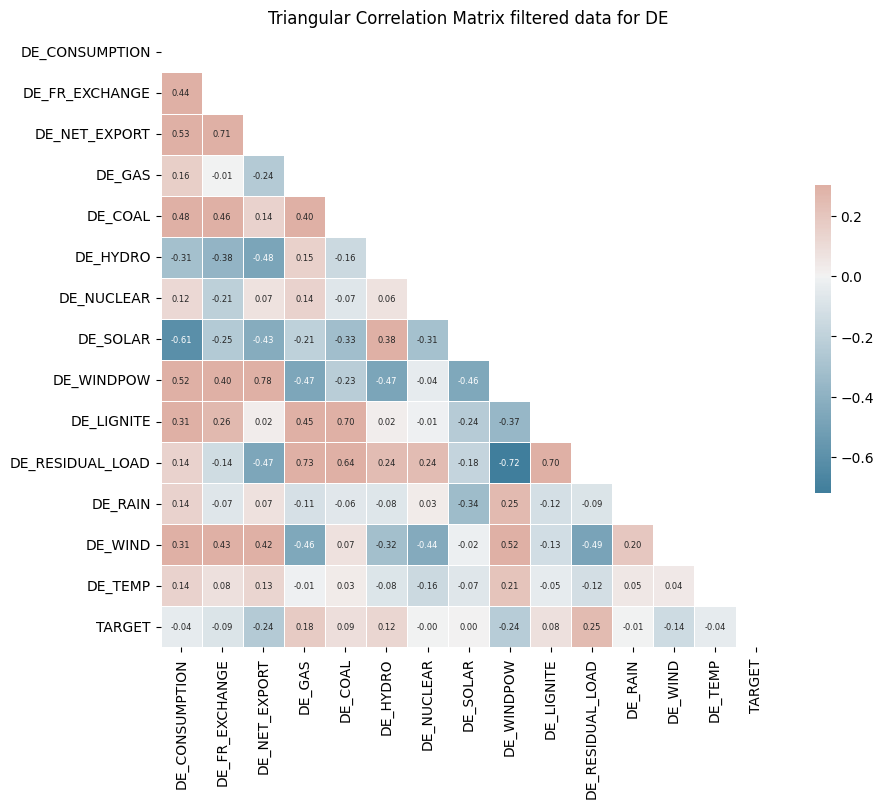

In [ ]:
# Visualize the correlation matrix for filtered data
corr_filtered_DE = X_train_DE.merge(Y_train,on="ID").drop(columns=["ID","DAY_ID", "DE_NET_IMPORT"]).corr()

# Create a mask for the upper triangle
mask_filtered_DE = np.triu(np.ones_like(corr_filtered_DE, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Define colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with annotations
sns.heatmap(corr_filtered_DE, mask=mask_filtered_DE, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot=True, fmt=".2f", annot_kws={"size": 6})

plt.title('Triangular Correlation Matrix filtered data for DE')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error
import matplotlib.pyplot as plt

# Splitting the data into features and target
X = X_train_DE.merge(Y_train,on="ID").drop(columns=["ID","DAY_ID"]).drop(columns=["TARGET"])
y = X_train_DE.merge(Y_train,on="ID").drop(columns=["ID","DAY_ID"])["TARGET"]

# Splitting the data into training and testing sets
X_train_, X_test_, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Bagging": BaggingRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, objective='reg:squarederror')  # For XGBoost, we specify 'objective' as 'reg:squarederror' for regression
}

# Dictionary to store evaluation metrics and feature importance
results_test = {"Model": [], "MSE": [], "MAE": [], "RMSE": [], "MedAE": [], "R2": [], "spearmanr": []}

# Train, predict, and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_, y_train)

    # Predict on the testing set
    y_pred = model.predict(X_test_)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    spearmanr_val = spearmanr(y_pred, y_test).correlation


    # Store results
    results_test["Model"].append(model_name)
    results_test["MSE"].append(mse)
    results_test["MAE"].append(mae)
    results_test["RMSE"].append(rmse)
    results_test["MedAE"].append(medae)
    results_test["R2"].append(r2)
    results_test["spearmanr"].append(spearmanr_val)


# Convert results to DataFrame for easy visualization
results_test_df_DE = pd.DataFrame(results_test)
results_test_df_DE


,Model,MSE,MAE,RMSE,MedAE,R2,spearmanr
0,Decision Tree,2.683487,1.030843,1.638135,0.597341,-1.356411,0.053035
1,Bagging,1.191816,0.698234,1.091703,0.442318,-0.046552,0.315647
2,Random Forest,1.090067,0.636200,1.044063,0.358497,0.042795,0.380735
3,AdaBoost,1.315188,0.844015,1.146816,0.607926,-0.154887,0.229071
4,Gradient Boosting,1.150706,0.686574,1.072710,0.435203,-0.010452,0.272581
5,XGBoost,0.983471,0.653272,0.991701,0.507575,0.136399,0.369797


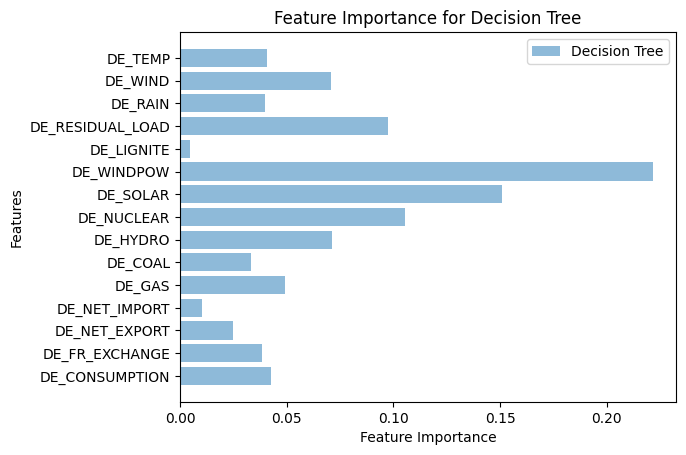

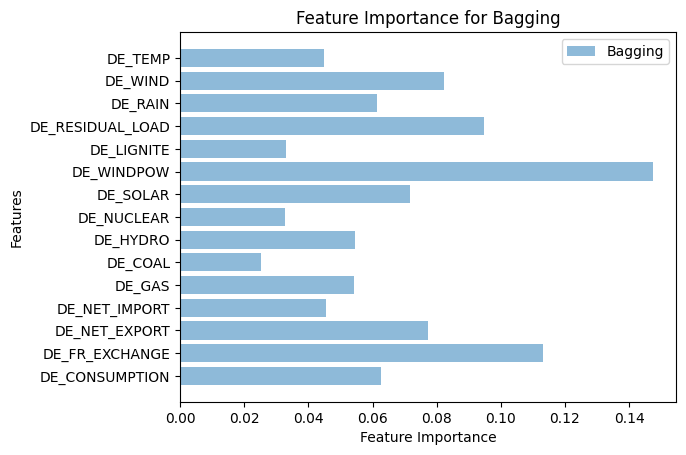

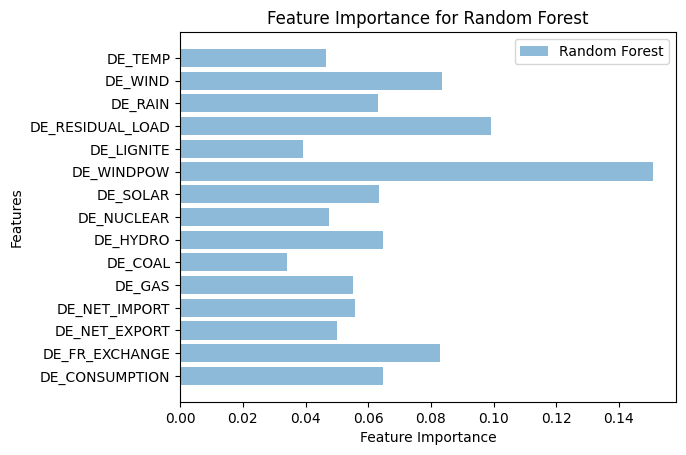

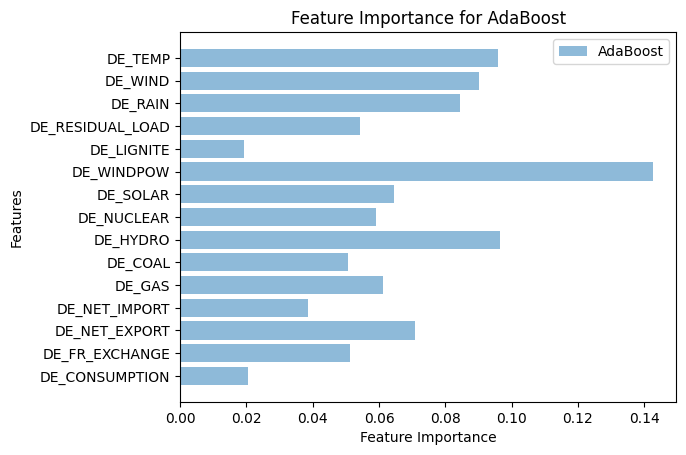

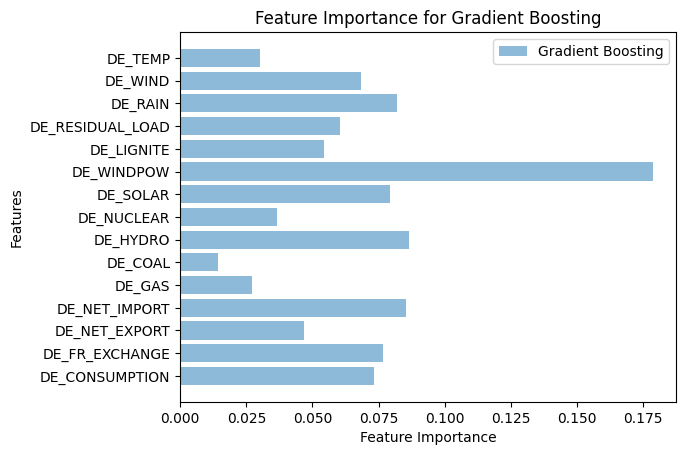

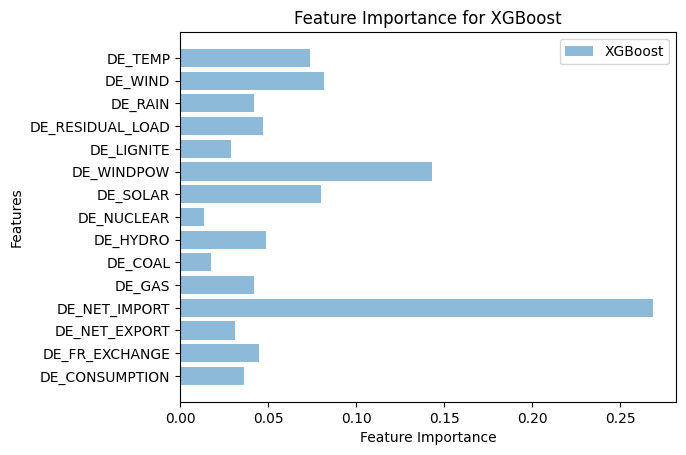

In [ ]:
# Plotting feature importance
for model_name, model in models.items():

    if hasattr(model, 'feature_importances_'):
        feature_importance = model.feature_importances_
    else:
        feature_importance = np.mean([tree.feature_importances_ for tree in model.estimators_], axis=0)

    plt.barh(range(len(feature_importance)), feature_importance, align='center', alpha=0.5, label=model_name)

    plt.yticks(range(len(X.columns)), X.columns)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title(f'Feature Importance for {model_name}')
    plt.legend()
    plt.show()

In [23]:
from tqdm import tqdm

from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid for each model
param_grids = {
    "Decision Tree": {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Bagging": {
        'n_estimators': [10, 50, 100],
        'max_samples': [0.5, 1.0],
        'max_features': [0.5, 1.0]
    },
    "Random Forest": {
        'n_estimators': [10, 50, 100],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "AdaBoost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0],
        'max_depth': [3, 5, 7]
    },
    "XGBoost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0],
        'max_depth': [3, 5, 7]
    }
}
# Splitting the data into features and target
X = X_train_DE.merge(Y_train,on="ID").drop(columns=["ID","DAY_ID"]).drop(columns=["TARGET"])
y = X_train_DE.merge(Y_train,on="ID").drop(columns=["ID","DAY_ID"])["TARGET"]

# Splitting the data into training and testing sets
X_train_, X_test_, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store best estimators
best_estimators = {}


results_test_FT = {"Model": [], "MSE": [], "MAE": [], "RMSE": [], "MedAE": [], "R2": [], "spearmanr": []}


# Train, predict, and evaluate each model with hyperparameter tuning
for model_name, model in models.items():
    print(model_name)
    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name],
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

    # Perform grid search
    with tqdm(total=len(param_grids[model_name]), desc=f'Tuning {model_name}', position=0) as pbar:
        grid_search.fit(X_train_, y_train)
        pbar.update(1)


    # Get the best estimator
    best_estimator = grid_search.best_estimator_

    # Store the best estimator
    best_estimators[model_name] = best_estimator

    # Predict on the testing set with the best estimator
    y_pred = best_estimator.predict(X_test_)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    spearmanr_val = spearmanr(y_pred, y_test).correlation

    # Store results
    results_test_FT["Model"].append(model_name + ' (Tuned)')
    results_test_FT["MSE"].append(mse)
    results_test_FT["MAE"].append(mae)
    results_test_FT["RMSE"].append(rmse)
    results_test_FT["MedAE"].append(medae)
    results_test_FT["R2"].append(r2)
    results_test_FT["spearmanr"].append(spearmanr_val)

# Convert results to DataFrame for easy visualization
results_test_FT = pd.DataFrame(results_test_FT)

# Display results
results_test_FT


Decision Tree


Tuning Decision Tree:  33%|███▎      | 1/3 [00:03<00:06,  3.05s/it]


Bagging


Tuning Bagging:  33%|███▎      | 1/3 [00:13<00:26, 13.36s/it]


Random Forest


Tuning Random Forest:  25%|██▌       | 1/4 [01:26<04:19, 86.38s/it]


AdaBoost


Tuning AdaBoost:  50%|█████     | 1/2 [00:11<00:11, 11.31s/it]


Gradient Boosting


Tuning Gradient Boosting:  33%|███▎      | 1/3 [00:38<01:17, 38.95s/it]


XGBoost


Tuning XGBoost:  33%|███▎      | 1/3 [00:30<01:01, 30.60s/it]


,Model,MSE,MAE,RMSE,MedAE,R2,spearmanr
0,Decision Tree (Tuned),2.145437,0.829281,1.464731,0.385845,-0.883941,0.180119
1,Bagging (Tuned),1.032869,0.634706,1.016302,0.422937,0.093022,0.388833
2,Random Forest (Tuned),1.072251,0.632593,1.035496,0.401588,0.058440,0.381526
3,AdaBoost (Tuned),1.095170,0.643067,1.046504,0.367932,0.038314,0.309203
4,Gradient Boosting (Tuned),1.122824,0.657047,1.059634,0.375120,0.014031,0.286023
5,XGBoost (Tuned),1.090106,0.638355,1.044082,0.362035,0.042761,0.328585


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Define the custom scoring function using Spearman correlation
def spearmanr_score(y_true, y_pred):
    return spearmanr(y_true, y_pred).correlation

# Make a scorer from the custom scoring function
spearmanr_scorer = make_scorer(spearmanr_score)


# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, scoring=spearmanr_scorer, n_jobs=-1)

# Perform grid search
grid_search.fit(X, y)



GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring=make_scorer(spearmanr_score))

In [25]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Display results
print("Best Parameters:", best_params)
print("Best Score (spearmanr_score):", best_score)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best Score (spearmanr_score): 0.2855313751778902


## France

In [26]:
corr_matrix = X_train_FR.merge(Y_train,on="ID").drop(columns=["ID","DAY_ID"]).corr()
iters = range(len(corr_matrix.columns) - 1)
drop_cols = []

for i in iters:
    for j in range(i+1):
        item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
        col = item.columns
        row = item.index
        val = abs(item.values)

        if val >= 0.8:
            drop_cols.append(col.values[0])

drops = set(drop_cols)
x = X_train_FR.drop(columns=drops)
print('Columns to remove {}'.format(drops))

Columns to remove {'FR_RESIDUAL_LOAD', 'FR_NET_IMPORT'}


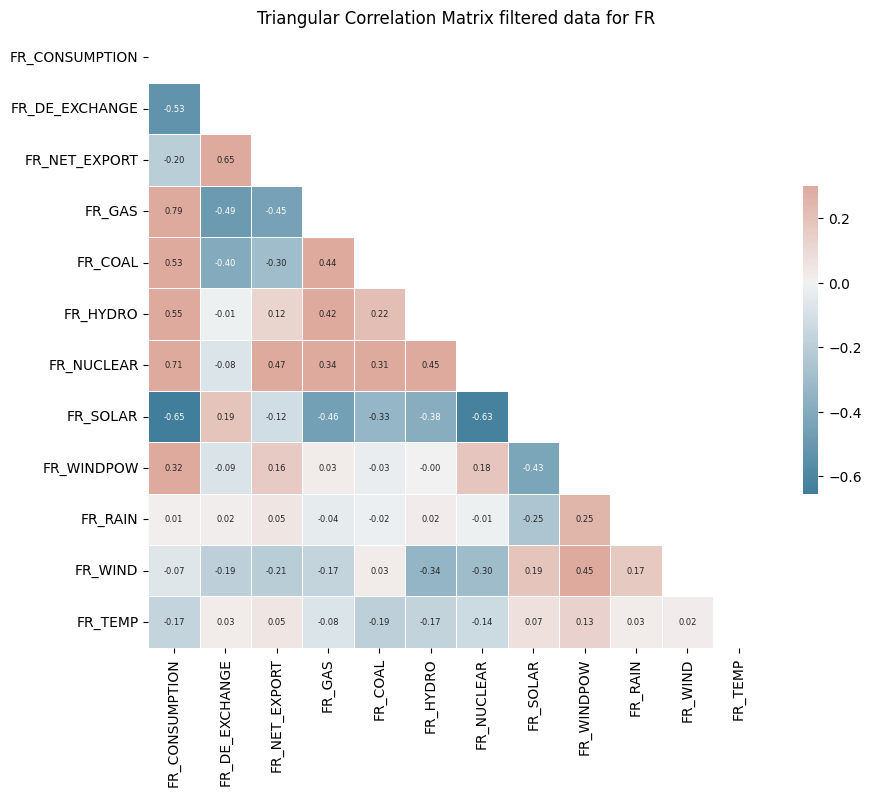

In [27]:
# Visualize the correlation matrix for filtered data
corr_filtered_DE = X_train_FR.drop(columns=["ID","DAY_ID", "FR_NET_IMPORT", "FR_RESIDUAL_LOAD"]).corr()

# Create a mask for the upper triangle
mask_filtered_DE = np.triu(np.ones_like(corr_filtered_DE, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Define colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with annotations
sns.heatmap(corr_filtered_DE, mask=mask_filtered_DE, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot=True, fmt=".2f", annot_kws={"size": 6})

plt.title('Triangular Correlation Matrix filtered data for FR')
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error
import matplotlib.pyplot as plt

# Splitting the data into features and target
X = X_train_FR.merge(Y_train,on="ID").drop(columns=["ID","DAY_ID"]).drop(columns=["TARGET"])
y = X_train_FR.merge(Y_train,on="ID").drop(columns=["ID","DAY_ID"])["TARGET"]

# Splitting the data into training and testing sets
X_train_, X_test_, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Bagging": BaggingRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, objective='reg:squarederror')  # For XGBoost, we specify 'objective' as 'reg:squarederror' for regression
}

#from scipy.stats import pearsonr
#, "Feature Importance": []
# Dictionary to store evaluation metrics and feature importance
results = {"Model": [], "MSE": [], "MAE": [], "RMSE": [], "MedAE": [], "R2": [], "spearmanr": []}

# Train, predict, and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_, y_train)

    # Predict on the testing set
    y_pred = model.predict(X_test_)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    spearmanr_val = spearmanr(y_pred, y_test).correlation

    # Store results
    results["Model"].append(model_name)
    results["MSE"].append(mse)
    results["MAE"].append(mae)
    results["RMSE"].append(rmse)
    results["MedAE"].append(medae)
    results["R2"].append(r2)
    results["spearmanr"].append(spearmanr_val)


# Convert results to DataFrame for easy visualization
results_df_FR = pd.DataFrame(results)
results_df_FR


,Model,MSE,MAE,RMSE,MedAE,R2,spearmanr
0,Decision Tree,3.899244,1.173259,1.974650,0.533023,-0.952936,-0.105631
1,Bagging,2.085570,0.833197,1.444150,0.387032,-0.044558,0.130934
2,Random Forest,2.074722,0.796813,1.440390,0.344495,-0.039125,0.176610
3,AdaBoost,2.259485,0.919941,1.503158,0.566633,-0.131663,0.127740
4,Gradient Boosting,2.256056,0.849549,1.502017,0.356555,-0.129946,0.068819
5,XGBoost,2.344414,0.888649,1.531148,0.432248,-0.174199,0.066605


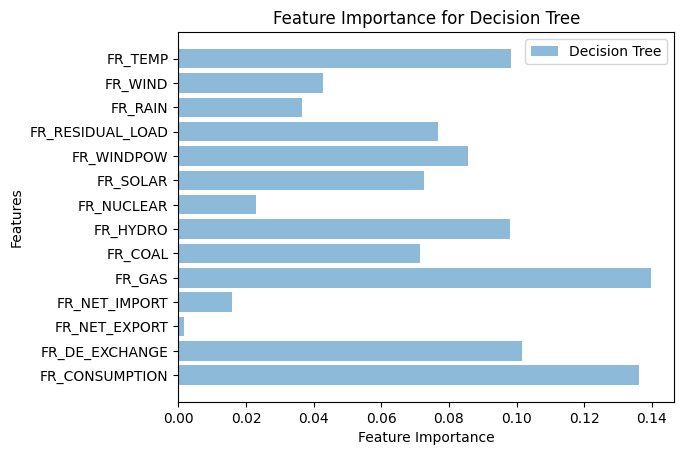

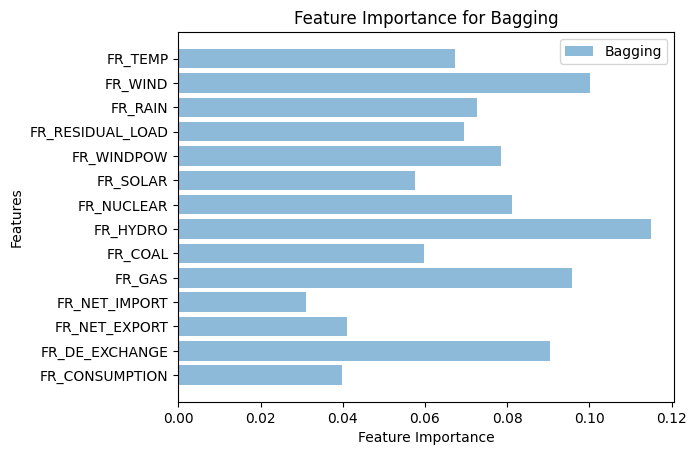

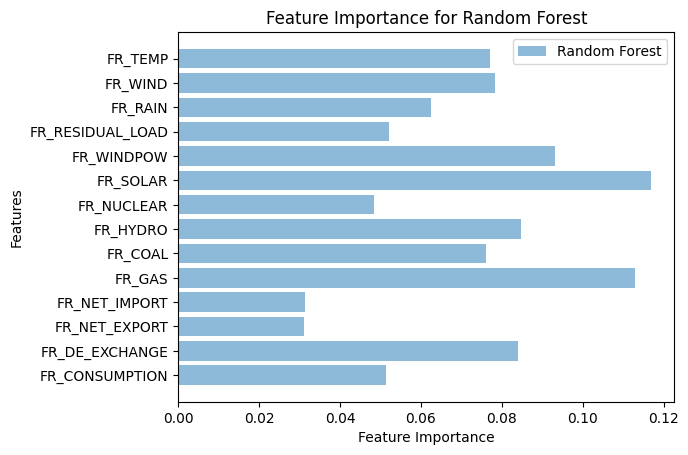

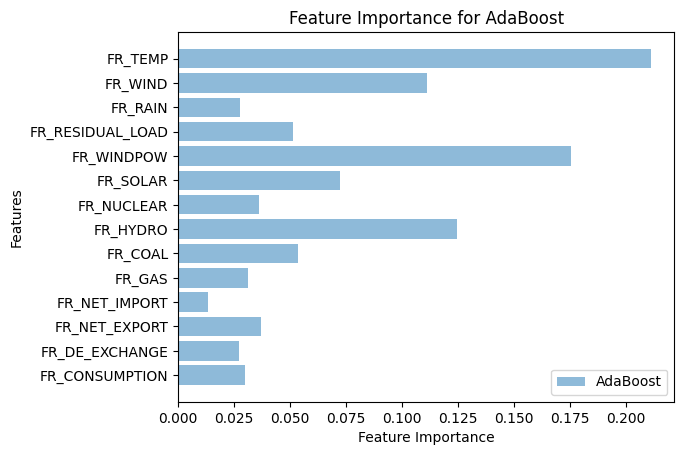

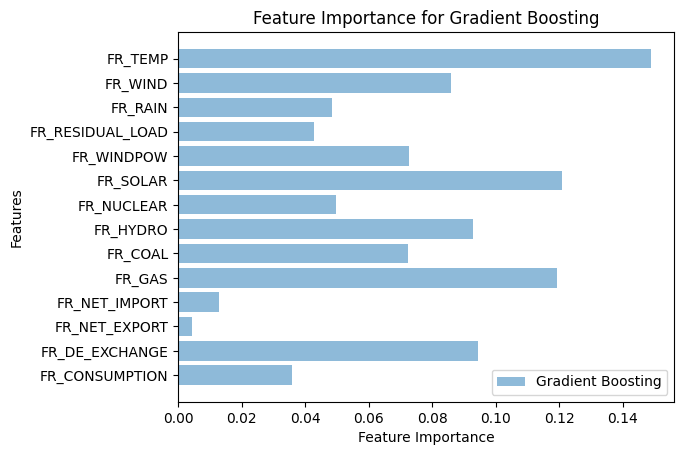

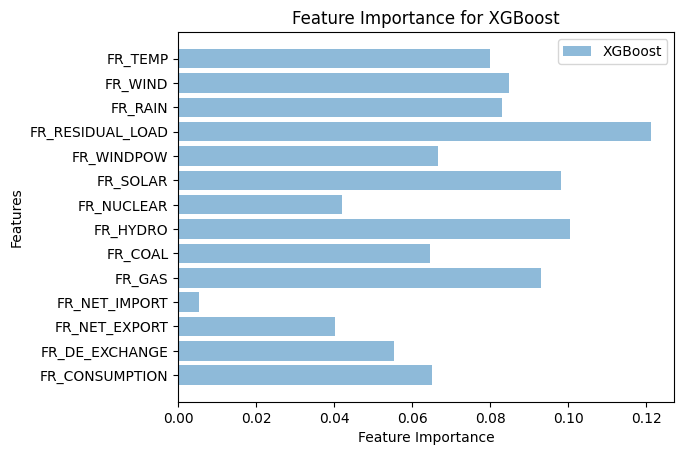

In [32]:
# Plotting feature importance
for model_name, model in models.items():

    if hasattr(model, 'feature_importances_'):
        feature_importance = model.feature_importances_
    else:
        feature_importance = np.mean([tree.feature_importances_ for tree in model.estimators_], axis=0)

    plt.barh(range(len(feature_importance)), feature_importance, align='center', alpha=0.5, label=model_name)

    plt.yticks(range(len(X.columns)), X.columns)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title(f'Feature Importance for {model_name}')
    plt.legend()
    plt.show()

In [35]:
from tqdm import tqdm

from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid for each model
param_grids = {
    "Decision Tree": {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Bagging": {
        'n_estimators': [10, 50, 100],
        'max_samples': [0.5, 1.0],
        'max_features': [0.5, 1.0]
    },
    "Random Forest": {
        'n_estimators': [10, 50, 100],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "AdaBoost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0],
        'max_depth': [3, 5, 7]
    },
    "XGBoost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0],
        'max_depth': [3, 5, 7]
    }
}
# Splitting the data into features and target
X = X_train_FR.merge(Y_train,on="ID").drop(columns=["ID","DAY_ID"]).drop(columns=["TARGET"])
y = X_train_FR.merge(Y_train,on="ID").drop(columns=["ID","DAY_ID"])["TARGET"]

# Splitting the data into training and testing sets
X_train_, X_test_, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store best estimators
best_estimators = {}


results_test_FT = {"Model": [], "MSE": [], "MAE": [], "RMSE": [], "MedAE": [], "R2": [], "spearmanr": []}


# Train, predict, and evaluate each model with hyperparameter tuning
for model_name, model in models.items():
    print(model_name)
    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name],
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

    # Perform grid search
    with tqdm(total=len(param_grids[model_name]), desc=f'Tuning {model_name}', position=0) as pbar:
        grid_search.fit(X_train_, y_train)
        pbar.update(1)


    # Get the best estimator
    best_estimator = grid_search.best_estimator_

    # Store the best estimator
    best_estimators[model_name] = best_estimator

    # Predict on the testing set with the best estimator
    y_pred = best_estimator.predict(X_test_)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    spearmanr_val = spearmanr(y_pred, y_test).correlation

    # Store results
    results_test_FT["Model"].append(model_name + ' (Tuned)')
    results_test_FT["MSE"].append(mse)
    results_test_FT["MAE"].append(mae)
    results_test_FT["RMSE"].append(rmse)
    results_test_FT["MedAE"].append(medae)
    results_test_FT["R2"].append(r2)
    results_test_FT["spearmanr"].append(spearmanr_val)

# Convert results to DataFrame for easy visualization
results_test_FT = pd.DataFrame(results_test_FT)

# Display results
results_test_FT


Decision Tree


Tuning Decision Tree:  33%|███▎      | 1/3 [00:03<00:06,  3.30s/it]


Bagging


Tuning Bagging:  33%|███▎      | 1/3 [00:26<00:52, 26.26s/it]


Random Forest


Tuning Random Forest:  25%|██▌       | 1/4 [01:45<05:15, 105.12s/it]


AdaBoost


Tuning AdaBoost:  50%|█████     | 1/2 [00:12<00:12, 12.45s/it]


Gradient Boosting


Tuning Gradient Boosting:  33%|███▎      | 1/3 [00:43<01:26, 43.21s/it]


XGBoost


Tuning XGBoost:  33%|███▎      | 1/3 [00:28<00:56, 28.32s/it]


,Model,MSE,MAE,RMSE,MedAE,R2,spearmanr
0,Decision Tree (Tuned),2.866597,0.961071,1.693103,0.376957,-0.435735,0.039114
1,Bagging (Tuned),2.079621,0.788094,1.442089,0.353195,-0.041578,0.056138
2,Random Forest (Tuned),2.039215,0.788099,1.428011,0.338717,-0.021341,0.073561
3,AdaBoost (Tuned),2.030321,0.755313,1.424893,0.287897,-0.016886,0.077662
4,Gradient Boosting (Tuned),2.057987,0.776943,1.434569,0.296296,-0.030743,-0.011532
5,XGBoost (Tuned),2.063880,0.773269,1.436621,0.284359,-0.033694,0.005864


In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Define the custom scoring function using Spearman correlation
def spearmanr_score(y_true, y_pred):
    return spearmanr(y_true, y_pred).correlation

# Make a scorer from the custom scoring function
spearmanr_scorer = make_scorer(spearmanr_score)


# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, scoring=spearmanr_scorer, n_jobs=-1)

# Perform grid search
grid_search.fit(X, y)



GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring=make_scorer(spearmanr_score))

In [37]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Display results
print("Best Parameters:", best_params)
print("Best Score (spearmanr_score):", best_score)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Best Score (spearmanr_score): 0.07917957941466719
